<img src="images/TRU_Logo_Horizontal_RGB-colour37470.png" width=600 />
<!-- The line above is html code. This line is html comment, it won't affect the output -->

# Physics 2200 - Mechanics
## Project 4 - Orbital Motion

In [17]:
# Required modules
import math
import matplotlib.pyplot as plt
import PhysPlot
import numpy as np
import csv
from mpl_toolkits import mplot3d

## Newton's Law of Gravitation, and Kepler's Laws of Planetary Motion

Newton's Law of Gravitation gives the gravitational force which two objects exert on each other.

$$\vec{F} = G\frac{mM}{r^2}\hat{r}$$

The issue here is that this is the polar form of the equation, the "nice" version. However, polar coordinates are not ideal for numerical calculations because the basis vector change everytime the position changes, so we need to first convert the equation into cartesian. Hold on to your hats kids.

Recall that:

$$r^2 = x^2 + y^2$$
$$\theta = \tan^{-1}\left(\frac{y}{x}\right)$$

and 

$$\hat{r} = \frac{\vec{r}}{|\vec{r}|}$$

with $\vec{r} = x\hat{x} + y\hat{y}$

Some clever combining yields the follwing not nice equation

#### Newton's Law of Gravitation, Cartesian Form

$$\vec{F} = GmM\left(\frac{x\hat{x}}{(x^2 + y^2)^{3/2}} + \frac{y\hat{y}}{(x^2 + y^2)^{3/2}}\right)$$

The textbook uses a much more horrific version of the equation, which deals with the separation vector $r_{12} = (x_2 - x_1) \hat{x} + (y_2 - y_2) \hat{y}$, but we're going to assume the origin is both the location of the star and the location of the focus of the elliptical orbit.

## Problem 1. Types of orbits (1 point).
Using Newton's Law of Gravitation, solve for the trajectory of a planet orbitting a star using the second order Runge-kutta method (RK2). 

Generate numerical solutions and plots for each of the different types of "orbits" by changing the initial conditions. You should try to recreate figure 6.5.2.e in the textbook. Notice you have to solve for the orbit by numerical integration (you should not simply plot analytical expression for an ellipse, parabola, etc...).

1. Elliptical
2. Parabolic
3. Hyperbolic

The conditions required for each orbit type is known from class, and to generate certain plots, you'll need to use negative time for a proper plot (*Hint: there should be only one parameter that changes in each case*).

Here is what my plot looks like (don't worry about making the dots representing the planet and the star).

<img src="images/p4_p1.jpg" width=500 style="float:left"/>

In [18]:
# rk2 function that takes in the acceleration as a function in terms of position, velocity, and time.
# Uses it to compute one iteration of the rk2 method 
# from p3 reusing here

def rk2(afunc,xi,vi,ti,dt):
    a = afunc(vi,xi,ti)
    tt = ti + dt/2
    xt = xi + vi*dt/2
    vt = vi + a*dt/2
    at = afunc(vt,xt,tt)
    vf = vi + at*dt
    xf = xi + vt*dt
    
    return xf, vf
    

In [47]:
# constants used (https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html)

Msun = 1.9885 * 10**30 # kg
Mearth = 5.9724 * 10**24 # kg
G = 6.67408 * 10**(-11) # gravitational constant
rorbit = 1.496 * 10**11 # m, orbital radius of earth around sun
vearth = 2.978 * 10**4 # m/s

The force equation for Newton's law of gravitation above was divided by the mass of the planet $(m)$ to get the acceleration of the planet,

$$\vec{a} = GM\left(\frac{x\hat{x}}{(x^2 + y^2)^{3/2}} + \frac{y\hat{y}}{(x^2 + y^2)^{3/2}}\right)$$.

This was implimented as an acceleration function to use with my rk2 fucntion.

In [71]:
# newtons law of gravitation, only in terms of star mass to get planetary acceleration, assuming star position is constant
# acts on 2d x array with x in [0] and y in [1]

def NLG(vi,xi,ti):
    a = np.zeros(len(xi))
    a[0] = - G * Msun * xi[0] / (xi[0]**2 + xi[1]**2) ** (3/2)
    a[1] = - G * Msun * xi[1] / (xi[0]**2 + xi[1]**2) ** (3/2)
    return a

To get the different tragectories I used particles with the mass of the earth and different intial velocities, units of distance are divied by 1 au at the end of computation to make the final plot nicer, where 1 au is the mean radius of earths orbit $(1.496 \times 10^{11} m)$.

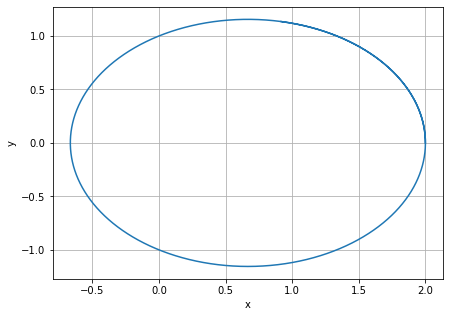

In [77]:
gamma = 0.2 # gamma in s^-1

vy0 = vearth*0.5 # inital speed in m/s (average orbital speed of earth), decreased for eliptical orbit
vx0 = 0
x0 = rorbit*2 # inital x, increased for eliptical orbit 
y0 = 0 # inital y, set to 0 since starting on x axis
dt = 3600 # 1 h in s (24 timesteps per day)
tf = 365*24*3600*2 # length of year in s times 2

# create arrays for position and velocity in x and y
t = np.arange(0,tf,dt)
x = np.zeros((len(t),2))
v = np.zeros((len(t),2))

# set inital conditions
x[0,0] = x0
x[0,1] = y0
v[0,0] = vx0
v[0,1] = vy0

# numerical for loop
for i in range(len(t) -1):
    x[i + 1,:], v[i + 1,:] = rk2(NLG, x[i,:], v[i,:], t[i], dt)


PhysPlot.plot(x[:,0]/rorbit,x[:,1]/rorbit, "x","y")

# PhysPlot.plot(t, E, r"Time ($t,$ $s$)", r"Energy ($E,$ $J$)")
# PhysPlot.multiplot([x[0:i], xa[0:nodragstop], xalindrag[0:i]], [z[0:i], za[0:nodragstop], zalindrag[0:i]], ["Numerical", "Analytic - no drag", "Analytic - drag"], "x (m)", "z (m)")

## Problem 2. Verify Kepler's Laws of Planetary Motion (4 points)
Using Newton's Law of Gravitation, solve for the trajectory of a planet orbitting a star using the second order Runge-kutta method (RK2). The initial conditions are yours to choose, as well as the parameters, but make sure the resulting orbit is elliptical. Make sure you run the integration for a full oscillation, so the planet returns to its (approximate) original position.

Kepler's Laws are:

#### 1) Law of Ellipses: The orbit of a planet is an ellipse with the Sun at one of its foci (2points).

For this part you should:

1) Plot the orbit you obtained ($x \times y$).
2) Calculate the kinetic energy, the potential energy, the total energy and the angular momentum for every time step. Recall that:

$$E = \frac{1}{2}mv^2 + V$$
$$L = \vec{r} \times m\vec{v}$$

3) Plot the three energies (total, potential and kinetic) in a single graph as a function of time. Is the total energy conserved?
4) Plot the total angular momentum as a function of time. Is it conserved?
5) Find the parameters a, b, and $\epsilon$ from your data. Recall that:

- $a$ is the distance from the "center" to the farthest distance out, semi-major axis
- $b$ is the distance from the "center" to the closest distance, semi-minor axis
- $\epsilon$ is the eccentricity of the ellipse

6) Use the values of a and b to recalculate the total energy E and the angular momentum L. Compare to what you obtained from position and velocity.

The equations that you should be using are (other equations are allowed if they are easier):

$$a^2 = b^2 + (\epsilon a)^2$$
$$\frac{L^2}{GMm^2}=a(1-\epsilon^2)$$
$$E = -\frac{GMm}{2a}$$

#### 2) Law of Equal Areas: An area swept by a line connecting the Sun and the planet over a constant time period will always be the same (1 point). 
Some geometry will be needed here. Remember how we calculated an increment of area from $\vec{r}$ and $d\vec{r}$ in class. There are two possible ways to prove this law:
1) Calculate the increment of area swept for each time step and plot this as a function of time. Do you get a constant?
2) Calculate the total area swepts for two equal chunks of time at two different parts of the orbit. Do you get the same total?

#### 3) Harmonic Law: The square of the orbital period of the planet is directly proportional to the cube of the semimajor axis of the planets orbit. 
That is:

$$\tau^2 = \frac{4\pi^2}{GM}a^3$$

Getting the orbital period is a little tricky here. Remember that the orbital period should be the time it takes for the initial position and the position at some time $\tau$ be the same as the initial position. However, because of numerical errors, the position after one cycle is not going to coincide perfectly with the initial position.

Yousing $\tau$ and $a$, show that the equation is satisfied.

Here is what my plots look like (don't worry about making the dots representing the planet and the star):

<img src="images/p4_p2a.jpg" width=500 style="float:left"/>
<img src="images/p4_p2b.jpg" width=500 style="float:center"/>
<img src="images/p4_p2c.jpg" width=500 style="float:left"/>
<img src="images/p4_p2d.jpg" width=500 style="float:center"/>

## Problem 3. Solve Problem C6.2 (2 points)
Solve problem C6.2 from the textbook.